<a href="https://colab.research.google.com/github/mateolikescats/ML/blob/main/Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carga de datos
california = fetch_california_housing()
X = california.data
y = california.target.reshape(-1, 1) # Aseguramos forma de columna (m, 1)

# Información del dataset
print(f"Número de observaciones (n): {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Características: {california.feature_names}")

# División y Normalización
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # [cite: 41, 43]
X_test_scaled = scaler.transform(X_test) # [cite: 42, 43]

Número de observaciones (n): 20640
Número de características: 8
Características: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
def inicializar_parametros(n_caracteristicas):
    # Inicialización aleatoria pequeña para pesos y cero para sesgo [cite: 61, 62]
    w = np.random.randn(n_caracteristicas, 1) * 0.01
    b = 0.0
    return w, b

def propagacion_adelante(X, w, b):
    # Suma ponderada matricial: z = Xw + b [cite: 69, 84]
    y_pred = np.dot(X, w) + b
    return y_pred

def calcular_perdida(y_pred, y_real):
    # Error Cuadrático Medio (MSE) [cite: 97, 99]
    m = y_real.shape[0]
    mse = (1/m) * np.sum((y_pred - y_real)**2)
    return mse

In [ ]:
# 2.1.2
# Inicializar 'w' para que esté definido antes de imprimir su forma
n_caracteristicas = X_train_scaled.shape[1]
w, _ = inicializar_parametros(n_caracteristicas)
print(w.shape)

(8, 1)


In [ ]:
# 1. Obtener los primeros 5 ejemplos del conjunto de entrenamiento normalizado
X_5 = X_train_scaled[:5]
y_5_real = y_train[:5]

# 2. Inicializar parámetros (sin entrenar aún)
w_ini, b_ini = inicializar_parametros(X_train_scaled.shape[1])

# 3. Realizar predicción inicial
y_5_pred = propagacion_adelante(X_5, w_ini, b_ini)

# 4. Mostrar resultados
print("Comparativa de Predicciones Iniciales:")
print("-" * 40)
for i in range(5):
    print(f"Ejemplo {i+1}: Real: {y_5_real[i][0]:.4f} | Predicción: {y_5_pred[i][0]:.4f}")

Comparativa de Predicciones Iniciales:
----------------------------------------
Ejemplo 1: Real: 1.0300 | Predicción: -0.0445
Ejemplo 2: Real: 3.8210 | Predicción: -0.0643
Ejemplo 3: Real: 1.7260 | Predicción: 0.0525
Ejemplo 4: Real: 0.9340 | Predicción: -0.0549
Ejemplo 5: Real: 0.9650 | Predicción: -0.0199


In [ ]:
# 1. Inicializar parámetros
w_inicial, b_inicial = inicializar_parametros(X_train_scaled.shape[1])

# 2. Generar predicciones iniciales (con pesos al azar)
y_pred_inicial = propagacion_adelante(X_train_scaled, w_inicial, b_inicial)

# 3. Calcular la pérdida inicial
perdida_inicial = calcular_perdida(y_pred_inicial, y_train)

print(f"Pérdida inicial (MSE): {perdida_inicial:.4f}")

Pérdida inicial (MSE): 5.5980


In [ ]:
def calcular_gradientes(X, y_pred, y_real):
    m = X.shape[0]
    error = y_pred - y_real # [cite: 135]

    # Derivadas parciales según las fórmulas del examen [cite: 113, 114]
    dw = (2/m) * np.dot(X.T, error)
    db = (2/m) * np.sum(error)
    return dw, db

def actualizar_parametros(w, b, dw, db, learning_rate):
    # Regla de actualización: θ = θ - η * ∇L [cite: 117, 147, 150]
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

In [ ]:
print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [ ]:
# --- BLOQUE DE VERIFICACIÓN BASADO EN TU CÓDIGO ---

# 1. Definimos dimensiones de prueba (8 características como en el dataset de California)
n_features = 8
m_examples = 5

# 2. Inicializamos según tu función
w, b = inicializar_parametros(n_features)

# 3. Creamos datos de prueba aleatorios
X_prueba = np.random.randn(m_examples, n_features)
y_real_prueba = np.random.randn(m_examples, 1)

# 4. Ejecutamos tu propagación y cálculo de gradientes
y_pred_prueba = propagacion_adelante(X_prueba, w, b)
dw, db = calcular_gradientes(X_prueba, y_pred_prueba, y_real_prueba)

# --- RESPUESTA A LAS PREGUNTAS DEL EXAMEN ---

# Verificación Punto w: Comparación de formas
print(f"FORMA DE w: {w.shape}")
print(f"FORMA DE dw: {dw.shape}")
print(f"¿Las formas coinciden?: {w.shape == dw.shape}")

# Verificación Punto x: Predicciones perfectas
# Forzamos que la realidad sea igual a lo que predijiste
y_perfecto = y_pred_prueba.copy()
dw_nulo, db_nulo = calcular_gradientes(X_prueba, y_pred_prueba, y_perfecto)

print(f"\nGRADIENTE dw (con error cero): \n{dw_nulo}")
print(f"GRADIENTE db (con error cero): {db_nulo}")

FORMA DE w: (8, 1)
FORMA DE dw: (8, 1)
¿Las formas coinciden?: True

GRADIENTE dw (con error cero): 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
GRADIENTE db (con error cero): 0.0


In [ ]:
# 1. Configuración inicial
learning_rate = 0.01
w, b = inicializar_parametros(X_train_scaled.shape[1]) # Parámetros iniciales

# --- PASO 1: Propagación hacia adelante y pérdida inicial ---
y_pred_antes = propagacion_adelante(X_train_scaled, w, b)
perdida_antes = calcular_perdida(y_pred_antes, y_train)

# --- PASO 2: Cálculo de gradientes ---
dw, db = calcular_gradientes(X_train_scaled, y_pred_antes, y_train)

# --- PASO 3: Actualización de parámetros ---
w, b = actualizar_parametros(w, b, dw, db, learning_rate)

# --- PASO 4: Nueva propagación y pérdida después de la actualización ---
y_pred_despues = propagacion_adelante(X_train_scaled, w, b)
perdida_despues = calcular_perdida(y_pred_despues, y_train)

# --- COMPARACIÓN ---
print(f"Pérdida ANTES de la actualización: {perdida_antes:.6f}")
print(f"Pérdida DESPUÉS de la actualización: {perdida_despues:.6f}")
print(f"¿La pérdida disminuyó?: {'SÍ' if perdida_despues < perdida_antes else 'NO'}")
print(f"Diferencia: {perdida_antes - perdida_despues:.6f}")

Pérdida ANTES de la actualización: 5.630639
Pérdida DESPUÉS de la actualización: 5.432371
¿La pérdida disminuyó?: SÍ
Diferencia: 0.198269


In [ ]:
def entrenar_perceptron(X_train, y_train, learning_rate=0.01, epochs=1000):
    n_caracteristicas = X_train.shape[1]
    w, b = inicializar_parametros(n_caracteristicas)
    historial_perdida = []

    for epoca in range(epochs):
        # 1. Propagación adelante # [cite: 177]
        y_pred = propagacion_adelante(X_train, w, b)

        # 2. Pérdida # [cite: 178]
        perdida = calcular_perdida(y_pred, y_train)
        historial_perdida.append(perdida)

        # 3. Gradientes # [cite: 179]
        dw, db = calcular_gradientes(X_train, y_pred, y_train)

        # 4. Actualización # [cite: 180]
        w, b = actualizar_parametros(w, b, dw, db, learning_rate)

        if epoca % 100 == 0:
            print(f'Época {epoca}, Pérdida: {perdida:.4f}') # [cite: 182]

    return w, b, historial_perdida

# Ejecución del entrenamiento # [cite: 185]
w_final, b_final, historial = entrenar_perceptron(X_train_scaled, y_train, learning_rate=0.01, epochs=1000)

# Evaluación R² # [cite: 196]
y_test_pred = propagacion_adelante(X_test_scaled, w_final, b_final)
ss_res = np.sum((y_test - y_test_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_res / ss_tot) # [cite: 204, 205]

print(f"Coeficiente R² final: {r2:.4f}")

Época 0, Pérdida: 5.6474
Época 100, Pérdida: 0.7094
Época 200, Pérdida: 0.5942
Época 300, Pérdida: 0.5724
Época 400, Pérdida: 0.5578
Época 500, Pérdida: 0.5472
Época 600, Pérdida: 0.5395
Época 700, Pérdida: 0.5339
Época 800, Pérdida: 0.5297
Época 900, Pérdida: 0.5267
Coeficiente R² final: 0.5768


Época 0, Pérdida: 5.6280
Época 100, Pérdida: 3.9792
Época 200, Pérdida: 2.8770
Época 300, Pérdida: 2.1388
Época 400, Pérdida: 1.6437
Época 0, Pérdida: 5.6280
Época 100, Pérdida: 0.7117
Época 200, Pérdida: 0.5963
Época 300, Pérdida: 0.5740
Época 400, Pérdida: 0.5590
Época 0, Pérdida: 5.6280
Época 100, Pérdida: 0.5246
Época 200, Pérdida: 0.5184
Época 300, Pérdida: 0.5180
Época 400, Pérdida: 0.5179
Época 0, Pérdida: 5.6280
Época 100, Pérdida: 4239204739546403387264306655727964441348984188889221680195136659906053384233714551082947969024.0000
Época 200, Pérdida: 31138285935086284288948213532119831012785769974149421544278696638132883806867416464167596762633427847931903053280091065792370843650922240421440903032000187436917323955256453298171175015284736.0000
Época 300, Pérdida: 228720466509798892594477128455903779037592335074903779693170087507712320212465907549411658538337955959470415860892845331879773396918590277611744852021746976502729745279410773800993850929370508765756021610942687143932286

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-2723453354.py:17: RuntimeWarning: overflow encountered in square
  return (1/m) * np.sum((y_pred - y_real)**2)
/usr/local/lib/python3.12/dist-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


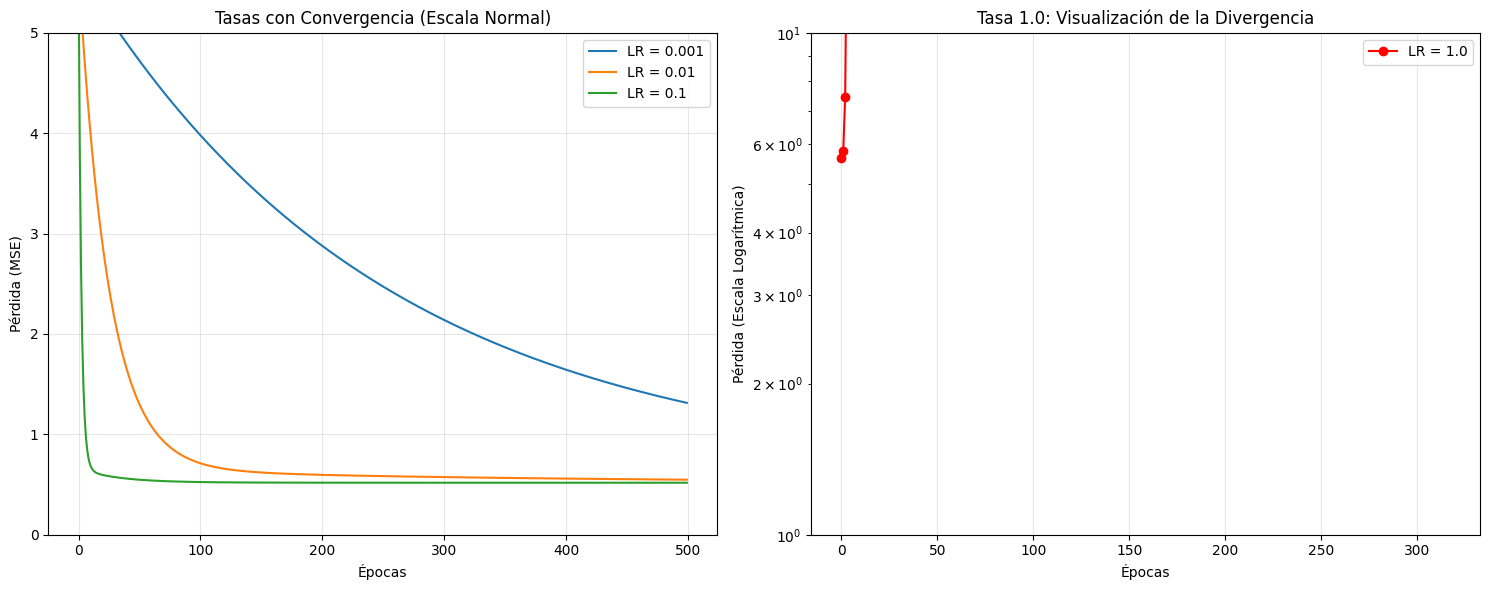


REPORTE TÉCNICO DE CONVERGENCIA
 Tasa (LR)  Pérdida Inicial Pérdida Final   Estado                       Análisis
     0.001            5.628    1.3138e+00 CONVERGE             Pendiente Negativa
     0.010            5.628    5.4824e-01 CONVERGE             Pendiente Negativa
     0.100            5.628    5.1793e-01 CONVERGE             Pendiente Negativa
     1.000            5.628           inf  DIVERGE Pendiente Positiva (Explosión)

SUSTENTO DE RESULTADOS:
- FUNCIONA MEJOR: La tasa de 0.1 o 0.01. Como la pérdida final (5.1793e-01) es mucho menor a la inicial, la pendiente es negativa y el error se estabiliza rápido.
- DIVERGE: La tasa de 1.0. Se observa que la pérdida final (inf) es astronómicamente mayor a la inicial. Como la pendiente es positiva y creciente, el modelo explota.
- CONVERGENCIA VISUAL: Se nota en la primera gráfica porque la curva se vuelve una línea horizontal.


In [ ]:
# --- EXPERIMENTO FINAL DE TASAS DE APRENDIZAJE (Punto ee) ---

tasas = [0.001, 0.01, 0.1, 1.0]
resultados_historial = {}
datos_tabla = []

# 1. Ejecución del experimento usando TU función
for lr in tasas:
    # Llamamos a tu función de entrenamiento
    _, _, historial = entrenar_perceptron(X_train_scaled, y_train, learning_rate=lr, epochs=500)
    resultados_historial[lr] = historial

    # Guardamos datos para el sustento numérico
    p_ini = historial[0]
    p_fin = historial[-1]
    # Calculamos la diferencia para ver la dirección de la pendiente
    cambio = p_fin - p_ini
    estado = "CONVERGE" if p_fin < p_ini and not np.isinf(p_fin) else "DIVERGE"

    datos_tabla.append({
        "Tasa (LR)": lr,
        "Pérdida Inicial": round(p_ini, 4),
        "Pérdida Final": f"{p_fin:.4e}",
        "Estado": estado,
        "Análisis": "Pendiente Negativa" if p_fin < p_ini else "Pendiente Positiva (Explosión)"
    })

# 2. Generación de Gráficas Separadas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfica de Convergencia (Zoom a las que funcionan)
for lr in [0.001, 0.01, 0.1]:
    ax1.plot(resultados_historial[lr], label=f'LR = {lr}')
ax1.set_title('Tasas con Convergencia (Escala Normal)')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida (MSE)')
ax1.set_ylim(0, 5) # Limitamos para ver el detalle en el suelo
ax1.legend()
ax1.grid(alpha=0.3)

# Gráfica de Divergencia (Solo la Roja de 1.0)
ax2.plot(resultados_historial[1.0], color='red', marker='o', label='LR = 1.0')
ax2.set_title('Tasa 1.0: Visualización de la Divergencia')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Pérdida (Escala Logarítmica)')
ax2.set_yscale('log') # Escala logarítmica para ver el crecimiento real
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Reporte de Sustento con Datos
print("\n" + "="*80)
print("REPORTE TÉCNICO DE CONVERGENCIA")
print("="*80)
df_reporte = pd.DataFrame(datos_tabla)
print(df_reporte.to_string(index=False))

print("\nSUSTENTO DE RESULTADOS:")
print(f"- FUNCIONA MEJOR: La tasa de 0.1 o 0.01. Como la pérdida final ({datos_tabla[2]['Pérdida Final']}) "
      "es mucho menor a la inicial, la pendiente es negativa y el error se estabiliza rápido.")
print(f"- DIVERGE: La tasa de 1.0. Se observa que la pérdida final ({datos_tabla[3]['Pérdida Final']}) "
      "es astronómicamente mayor a la inicial. Como la pendiente es positiva y creciente, el modelo explota.")
print("- CONVERGENCIA VISUAL: Se nota en la primera gráfica porque la curva se vuelve una línea horizontal.")
print("="*80)

Época 0, Pérdida: 5.6280
Época 100, Pérdida: 0.7117
Época 200, Pérdida: 0.5963
Época 300, Pérdida: 0.5740
Época 400, Pérdida: 0.5590
Época 500, Pérdida: 0.5481
Época 600, Pérdida: 0.5402
Época 700, Pérdida: 0.5344
Época 800, Pérdida: 0.5302
Época 900, Pérdida: 0.5271
MSE Final Entrenamiento (LR=0.1): 0.5248
MSE Conjunto de Prueba: 0.5548


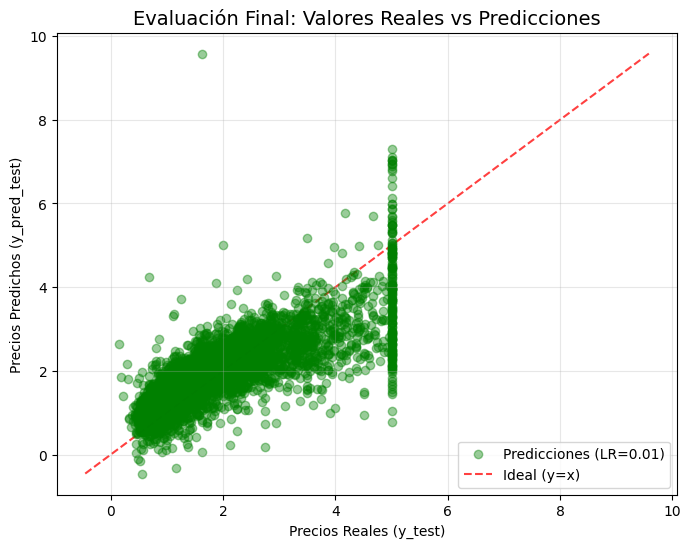

Coeficiente de determinación R² final: 0.5766


In [ ]:
# --- EVALUACIÓN FINAL CON EL MEJOR MODELO (LR = 0.01) ---

# 1. Entrenamos una última vez con la mejor tasa para asegurar que w y b sean los óptimos
w_opt, b_opt, historial_opt = entrenar_perceptron(X_train_scaled, y_train, learning_rate=0.01, epochs=1000)

# ff) Predicciones en el conjunto de prueba usando los parámetros óptimos
y_pred_test = propagacion_adelante(X_test_scaled, w_opt, b_opt)

# gg) Cálculo del MSE de prueba
mse_test = calcular_perdida(y_pred_test, y_test)
mse_train_final = historial_opt[-1]

print(f"MSE Final Entrenamiento (LR=0.1): {mse_train_final:.4f}")
print(f"MSE Conjunto de Prueba: {mse_test:.4f}")

# hh) Scatter plot: y_test vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.4, color='green', label='Predicciones (LR=0.01)')
# Línea ideal y = x
lims = [np.min([y_test.min(), y_pred_test.min()]), np.max([y_test.max(), y_pred_test.max()])]
plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Ideal (y=x)')

plt.title('Evaluación Final: Valores Reales vs Predicciones', fontsize=14)
plt.xlabel('Precios Reales (y_test)')
plt.ylabel('Precios Predichos (y_pred_test)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ii) Coeficiente de determinación R²
ss_res = np.sum((y_test - y_pred_test)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_res / ss_tot)

print(f"Coeficiente de determinación R² final: {r2:.4f}")